# Transfer learning

Transfer learning is leveraging a working model's existing architecture and learned patterns for our own problem.

There are two main benefits:

1. Can leverage an existing neural network architecture proven to work on problems similar to our own.
2. Can leverage a working neural network architecture which has already learned patterns on similar data to our own, then we can adapt those patterns to our own data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip.extractall()
zip.close()

--2023-07-02 22:35:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  35.7MB/s    in 5.1s    

2023-07-02 22:35:50 (31.6 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
import os

for dirpath,dirnames,filename in os.walk('10_food_classes_10_percent'):
  print(f"There are {len(dirnames)} dirctories and {len(filename)} images in '{dirpath}'")

There are 2 dirctories and 0 images in '10_food_classes_10_percent'
There are 10 dirctories and 0 images in '10_food_classes_10_percent/train'
There are 0 dirctories and 75 images in '10_food_classes_10_percent/train/steak'
There are 0 dirctories and 75 images in '10_food_classes_10_percent/train/ice_cream'
There are 0 dirctories and 75 images in '10_food_classes_10_percent/train/ramen'
There are 0 dirctories and 75 images in '10_food_classes_10_percent/train/hamburger'
There are 0 dirctories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'
There are 0 dirctories and 75 images in '10_food_classes_10_percent/train/sushi'
There are 0 dirctories and 75 images in '10_food_classes_10_percent/train/fried_rice'
There are 0 dirctories and 75 images in '10_food_classes_10_percent/train/chicken_curry'
There are 0 dirctories and 75 images in '10_food_classes_10_percent/train/chicken_wings'
There are 0 dirctories and 75 images in '10_food_classes_10_percent/train/pizza'
There are

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

training_data = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(224,224))
testing_data = test_datagen.flow_from_directory(test_dir,
                                                target_size=(224,224))

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
training_data

In [4]:
# Callback
import datetime
import tensorflow as tf

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorBoard_callback = tf.keras.callbacks.TensorBoard(log_dir)
  print(f"Saving TensorBoard log fils to: {log_dir}")

  return tensorBoard_callback

In [5]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [6]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [7]:
def create_model(model_url, num_classes=10):
  model = Sequential([
      hub.KerasLayer(model_url,
                     trainable=False,
                     input_shape=(224,224,3)),
      layers.Dense(num_classes, activation="softmax")
  ])
  return model

## Resnet model

In [8]:
res_model = create_model(resnet_url, num_classes=training_data.num_classes)

In [ ]:
training_data.num_classes

10

In [9]:
res_model.compile(loss ='categorical_crossentropy',
                  optimizer = Adam(),
                  metrics = ['accuracy'])

In [10]:
res_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              25615849  
                                                                 
 dense (Dense)               (None, 10)                10020     
                                                                 
Total params: 25,625,869
Trainable params: 10,020
Non-trainable params: 25,615,849
_________________________________________________________________


In [11]:
# fit the model
res_history = res_model.fit(training_data,
                            epochs=5,
                            steps_per_epoch = len(training_data),
                            validation_data = testing_data,
                            validation_steps=len(testing_data),
                            callbacks= [create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                    experiment_name="resnet50V2")])

Saving TensorBoard log fils to: tensorflow_hub/resnet50V2/20230702-230356
Epoch 1/5
24/24 [==============================] - 32s 844ms/step - loss: 2.1728 - accuracy: 0.3800 - val_loss: 1.1162 - val_accuracy: 0.6372
Epoch 2/5
24/24 [==============================] - 18s 777ms/step - loss: 0.9017 - accuracy: 0.7147 - val_loss: 0.8383 - val_accuracy: 0.7148
Epoch 3/5
24/24 [==============================] - 18s 766ms/step - loss: 0.6357 - accuracy: 0.8013 - val_loss: 0.7635 - val_accuracy: 0.7432
Epoch 4/5
24/24 [==============================] - 17s 748ms/step - loss: 0.4916 - accuracy: 0.8560 - val_loss: 0.7447 - val_accuracy: 0.7496
Epoch 5/5
24/24 [==============================] - 18s 775ms/step - loss: 0.4013 - accuracy: 0.8947 - val_loss: 0.7204 - val_accuracy: 0.7584


<Axes: >

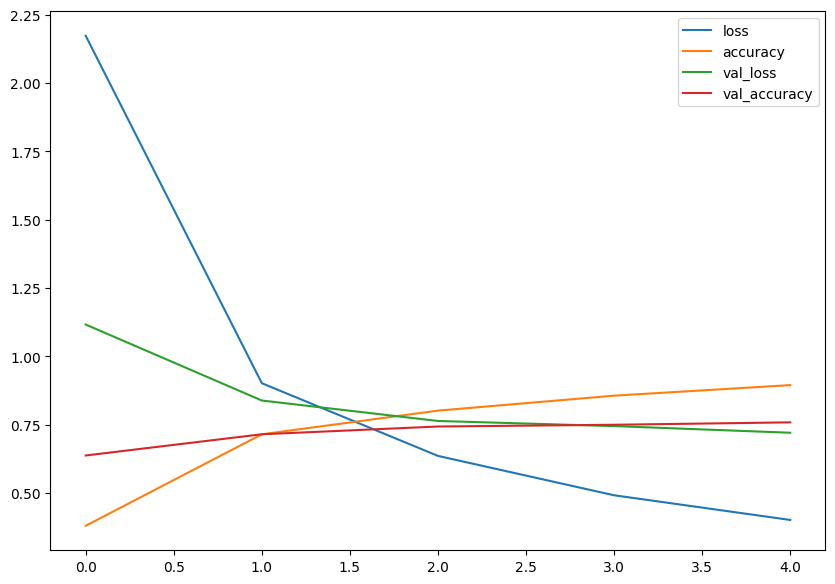

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(res_history.history).plot(figsize=(10,7))

In [13]:
def plot_loss_curve(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="Loss Curve")
  plt.plot(epochs, val_loss, label="Val_loss curve")
  plt.title("Loss Curves")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="Accuracy_curve")
  plt.plot(epochs, val_accuracy, label="Val_accuracy_curve")
  plt.title("Accuracy Curves")
  plt.legend()

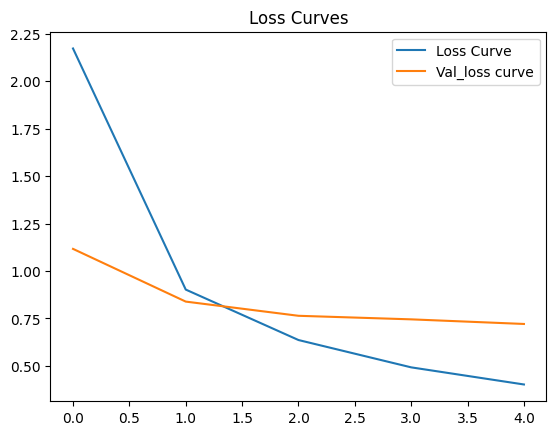

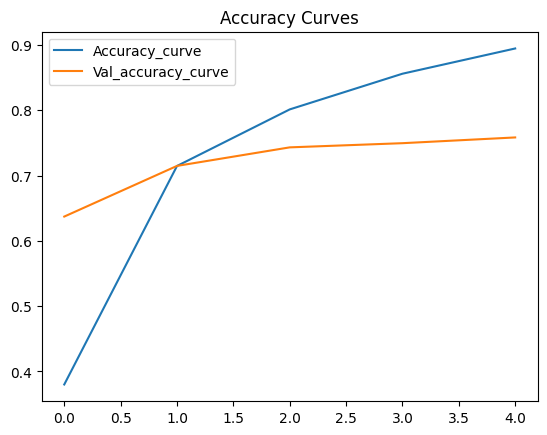

In [14]:
plot_loss_curve(res_history)

In [15]:
len(res_model.layers[0].weights) # The number of layers in resnet arch

2

## EfficientNet

In [16]:
eff_model = create_model(efficientnet_url, training_data.num_classes)

In [17]:
eff_model.compile(loss = "categorical_crossentropy",
                  optimizer = Adam(),
                  metrics= ['accuracy'])

In [18]:
eff_history = eff_model.fit(training_data,
                            epochs=5,
                            steps_per_epoch=len(training_data),
                            validation_data=testing_data,
                            validation_steps=len(testing_data),
                            callbacks= [create_tensorboard_callback(dir_name='tensorflow_hub',
                                                                    experiment_name="efficientNetB0")])

Saving TensorBoard log fils to: tensorflow_hub/efficientNetB0/20230702-231030
Epoch 1/5
24/24 [==============================] - 37s 1s/step - loss: 1.8844 - accuracy: 0.4173 - val_loss: 1.3058 - val_accuracy: 0.7324
Epoch 2/5
24/24 [==============================] - 17s 730ms/step - loss: 1.0687 - accuracy: 0.7800 - val_loss: 0.8664 - val_accuracy: 0.8184
Epoch 3/5
24/24 [==============================] - 17s 721ms/step - loss: 0.7552 - accuracy: 0.8427 - val_loss: 0.7021 - val_accuracy: 0.8400
Epoch 4/5
24/24 [==============================] - 17s 720ms/step - loss: 0.6083 - accuracy: 0.8640 - val_loss: 0.6133 - val_accuracy: 0.8504
Epoch 5/5
24/24 [==============================] - 18s 757ms/step - loss: 0.5148 - accuracy: 0.9027 - val_loss: 0.5610 - val_accuracy: 0.8556


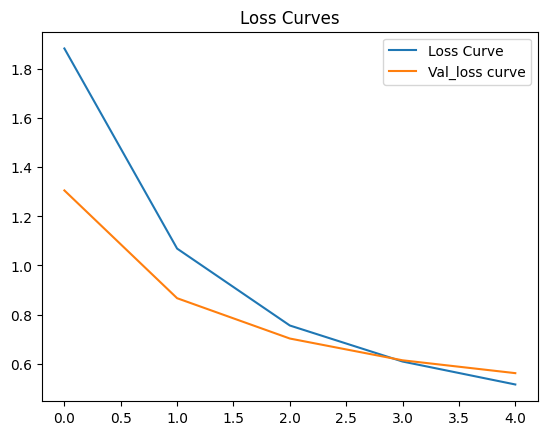

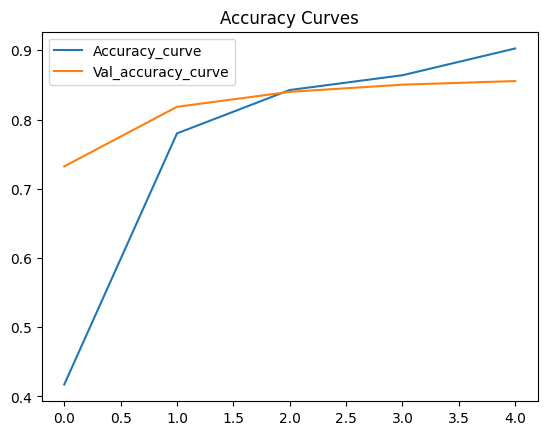

In [19]:
plot_loss_curve(eff_history)

In [23]:
len(eff_model.layers[0].weights)  # The number of layers in the efficientnet arch

309

## Comparing our models using TensorBoard

In [ ]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction model architectures using 10% of the training data" \
  --one_shot

In [ ]:
!tensorboard dev list

2023-03-03 20:30:09.842203: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-03 20:30:09.842310: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-03 20:30:09.842328: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
https://tensorboard.dev/experiment/oG1kB8j4R9qXF11ieHXHwA/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two different TF Hub fea

In [ ]:
!tensorboard dev delete --experiment_id oG1kB8j4R9qXF11ieHXHwA

2023-03-03 20:33:02.047560: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-03 20:33:02.047689: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-03 20:33:02.047725: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Deleted experiment oG1kB8j4R9qXF11ieHXHwA.


In [ ]:
!tensorboard dev list

2023-03-03 20:33:09.197297: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-03 20:33:09.197418: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-03 20:33:09.197438: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
No experiments. Use `tensorboard dev upload` to get started.
